In [10]:
!pip install cufflinks

  Stored in directory: C:\Users\preethi\AppData\Local\pip\Cache\wheels\7d\ba\8d\38b672c3e40d8bd22dd60b8e6e29965b43f2b4be4d064e44d5
Successfully built cufflinks


In [11]:
!pip install plotly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import plotly
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf 
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium 

In [2]:
df = pd.read_csv('C:\\Users\\preethi\\Downloads\\covid19-in-india\\covid_19_india.csv')

In [3]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
df.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [5]:
df.drop(['Sno'],axis = 1, inplace = True)

In [6]:
df.isnull().sum()

Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [7]:
df.shape

(1671, 8)

### Q1) How many confirmed cases are there in each state?

In [31]:
df['State/UnionTerritory'] = df['State/UnionTerritory'].apply(lambda x : x.strip('#'))

In [32]:
confirmed = df.groupby('State/UnionTerritory').sum()
confirmed

,Cured,Deaths,Confirmed
State/UnionTerritory,,,
Andaman and Nicobar Islands,356,0,719
Andhra Pradesh,5328,634,27869
Arunachal Pradesh,16,0,34
Assam,461,26,1158
Bihar,1490,74,6571
Chandigarh,380,2,1359
Chhattisgarh,741,0,1124
Dadar Nagar Haveli,0,0,1
Delhi,16908,1297,73099


In [33]:
len(states)

35

In [34]:
len(confirmed['Confirmed'])

35

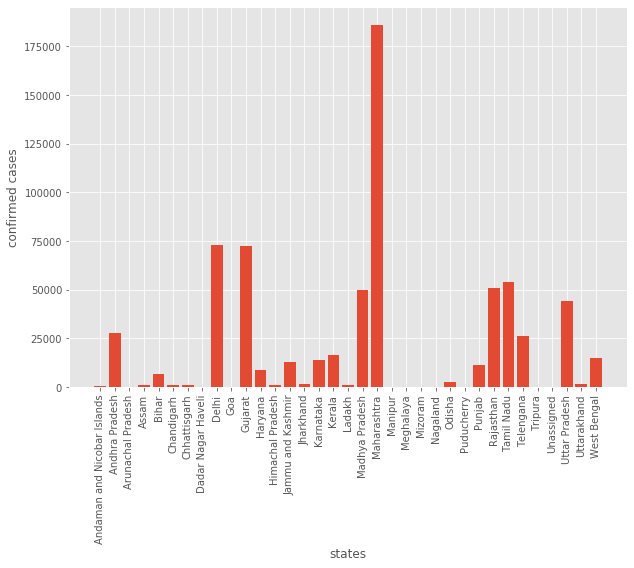

In [37]:
#matplotlib
plt.figure(figsize=(10,7))
plt.bar(states,confirmed['Confirmed'])
plt.xticks(rotation = 90)
plt.xlabel('states')
plt.ylabel('confirmed cases')
plt.show()

#plotty
px.bar(x = states,y = confirmed['Confirmed'],labels={'x':'State/Union Territory','y':'Confirmed Cases'})

### Q2) In which month does the covid cases reported the highest? 

In [38]:
df.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [39]:
df['Month'] = df['Date'].str[3:5]

In [40]:
df.groupby('Month').sum()

,Cured,Deaths,Confirmed
Month,,,
01,0,0,2
02,0,0,86
03,808,202,9687
04,75443,13270,422442
05,69009,8342,251191


In the month of april, covid cases seen the highest record.

### Q3) How many active cases are there in each state?

In [41]:
df['Active Cases'] = df['Confirmed'] - (df['Cured'] + df['Deaths'])

In [42]:
active = df.groupby('State/UnionTerritory').sum()

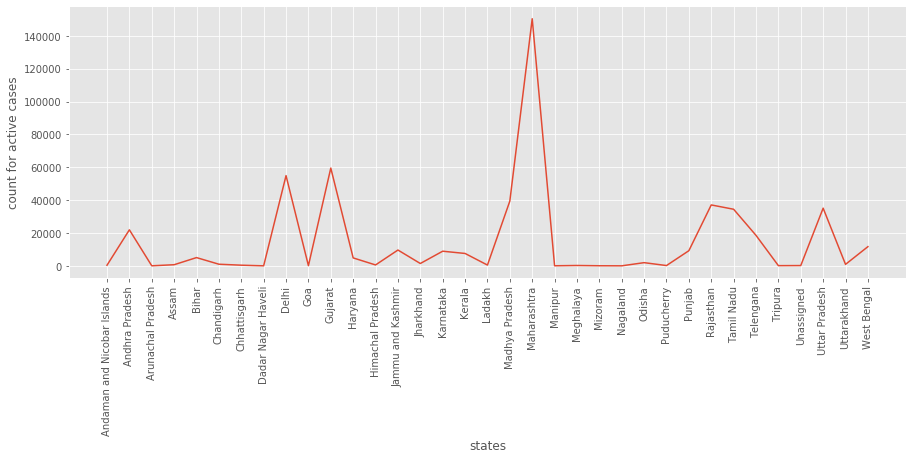

In [43]:
#matplotlib
plt.figure(figsize=(15,5))
plt.plot(states,active['Active Cases'])
plt.xticks(rotation = 90)
plt.xlabel('states')
plt.ylabel('count for active cases')
plt.show()

#plotty
px.bar(x = states,y = active['Active Cases'],labels={'x':'States/Union Territory','y':'Active Cases'})

From the above plot, we can clearly see the active cases.
since, maharashtra covid active cases are more 14000+ , which leads to the conclusion that if at the earliest they are not treated then the cases will increase day by day leading to double the infected people around the state.

### Instead of looking at the plots we can simply use the below method to find the heighest,lowest cases.

In [44]:
total = df.groupby('State/UnionTerritory')[['Cured','Deaths','Confirmed','Active Cases']].sum().sort_values(ascending=False, by='Active Cases')

In [45]:
total.style.background_gradient(cmap='Reds')

,Cured,Deaths,Confirmed,Active Cases
State/UnionTerritory,,,,
Maharashtra,27128,8616,186125,150381
Gujarat,9634,3540,72664,59490
Delhi,16908,1297,73099,54894
Madhya Pradesh,7760,2581,49719,39378
Rajasthan,13100,852,51008,37056
Uttar Pradesh,8615,690,44390,35085
Tamil Nadu,18779,569,53777,34429
Andhra Pradesh,5328,634,27869,21907
Telengana,7203,646,26382,18533


In [46]:
df1 = pd.read_excel('C:\\Users\\preethi\\Downloads\\covid19-in-india\\Indian Coordinates.xlsx')

In [47]:
df1.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [48]:
df1.rename(columns={'Name of State / UT':'State/UnionTerritory'},inplace = True)

In [49]:
df1.head()

,State/UnionTerritory,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [50]:
df1['State/UnionTerritory'] = df1['State/UnionTerritory'].replace({'Union Territory of Ladakh':'Ladakh','Union Territory of Jammu and Kashmir':'Jammu and Kashmir'})

In [51]:
merge = pd.merge(total,df1,on='State/UnionTerritory')

In [52]:
merge

,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases,Latitude,Longitude
0,Maharashtra,27128,8616,186125,150381,19.250232,73.160175
1,Delhi,16908,1297,73099,54894,28.669993,77.230004
2,Rajasthan,13100,852,51008,37056,26.449999,74.639981
3,Uttar Pradesh,8615,690,44390,35085,27.599981,78.050006
4,Tamil Nadu,18779,569,53777,34429,12.920386,79.150042
5,Andhra Pradesh,5328,634,27869,21907,14.750429,78.570026
6,Telengana,7203,646,26382,18533,18.112400,79.019300
7,Jammu and Kashmir,3185,183,12980,9612,33.450000,76.240000
8,Punjab,1550,504,11259,9205,31.519974,75.980003
9,Karnataka,4366,512,13772,8894,12.570381,76.919997


In [65]:
map = folium.Map(location=[20,70],zoom_start = 4,tiles = 'stamenterrain')
for lat,long,value,name in zip(merge['Latitude'],merge['Longitude'],merge['Confirmed'],merge['State/UnionTerritory']):
    folium.CircleMarker(location = [lat,long],radius =20,popup = ('<strong>State</strong>: '+ str(name).capitalize() +'<br>'+'<strong>Total cases</strong>: ' + str(value)+'<br>'),color='red',fill_color = 'red',fill_opacity = 0.3).add_to(map)

In [66]:
map